## Sleep Summary Stats <a class="anchor" id="sleep-summary-stats"></a>

In [9]:
sleep = pd.read_csv(data_dir + 'dataset_2021_07_19.csv')
# sleep = sleep[~sleep.index.isin(exclude)]
sleep = sleep.dropna(axis=1, how='all')

In [10]:
sleep[0:5]

,subject,redcap_id,age_group,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,onset_latency_fit,time_in_bed_fit,awake_duration_fit,wake_time_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,joinid,lag_time,arm
0,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.0,556.0,4.0,2019-10-25 05:19:00,552.0,508.0,4.0,10011 2019-10-25,NaN,1
1,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,NaN,NaN,NaN,NaN,482.0,NaN,NaN,10011 2019-10-26,1.0,1
2,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,NaN,NaN,NaN,NaN,538.5,NaN,NaN,10011 2019-10-27,1.0,1
3,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,10011 2019-10-28,1.0,1
4,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,10011 2019-10-29,1.0,1


<AxesSubplot:>

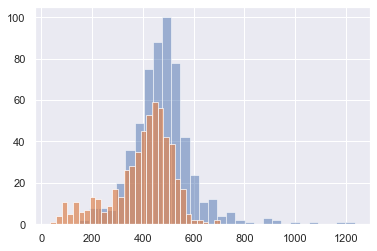

In [16]:
import scipy
sleep['sleep_duration_act'].hist(bins=30, label = "Actiwatch 2.0", alpha = 0.5)
sleep['sleep_duration_fit'].hist(bins=30, label = "Fitbit", alpha = 0.7)
# scipy.stats.shapiro(sleep['sleep_duration_fit'])

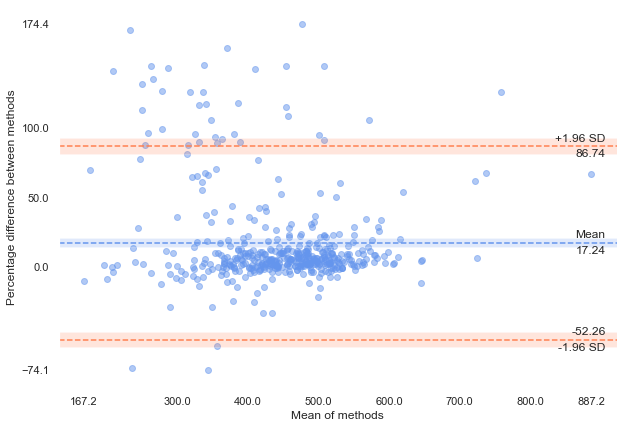

In [17]:
import pyCompare

sleep1 = sleep.dropna(axis = 0)

pyCompare.blandAltman(sleep1['sleep_duration_act'].values, sleep1['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

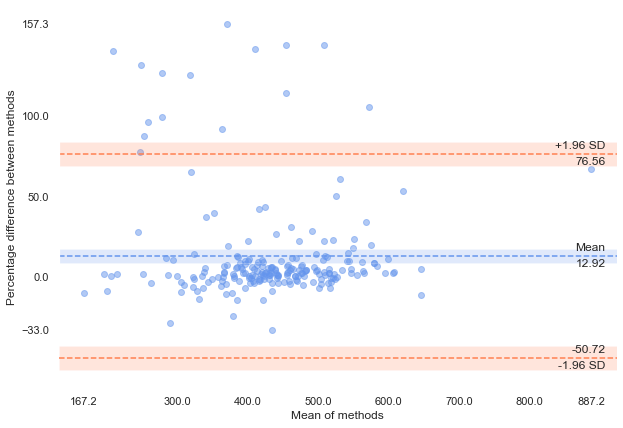

In [47]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['sleep_duration_act'].values, YA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

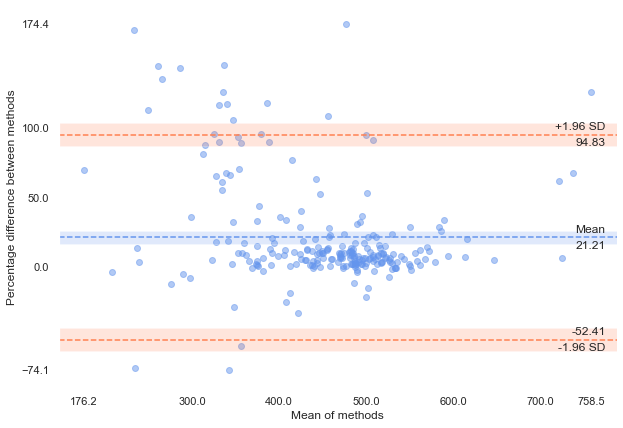

In [48]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['sleep_duration_act'].values, OA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Sleep duration assessed by the Actiwatch and Fitbit are significantly different. Because 70.63 > 0, Fitbit tends to underestimate sleep duration by about 70 minutes on average.

In [18]:
import pingouin as pg
pg.rm_corr(data=sleep, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.382482,435,1.132181e-16,"[0.3, 0.46]",1.0


<AxesSubplot:>

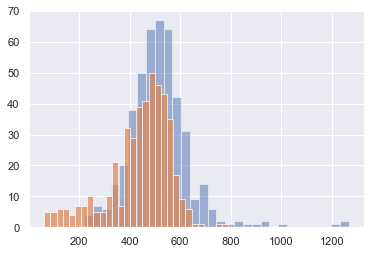

In [19]:
import scipy

sleep1['time_in_bed_act'].hist(bins=30, alpha = 0.5)
sleep1['time_in_bed_fit'].hist(bins=30, alpha = 0.7)
# scipy.stats.shapiro(sleep1['time_in_bed_fit'])

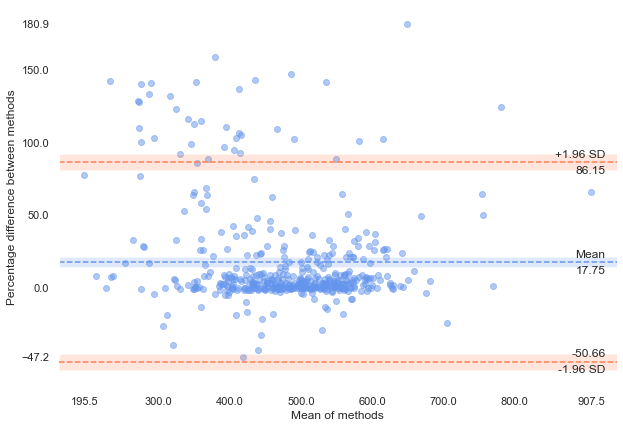

In [20]:
pyCompare.blandAltman(sleep1['time_in_bed_act'].values, sleep1['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

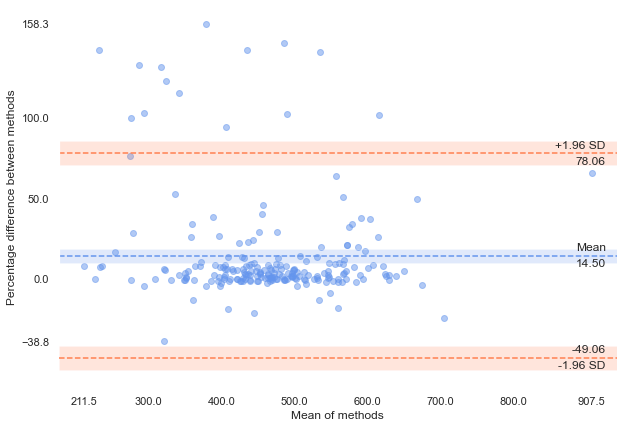

In [45]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['time_in_bed_act'].values, YA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

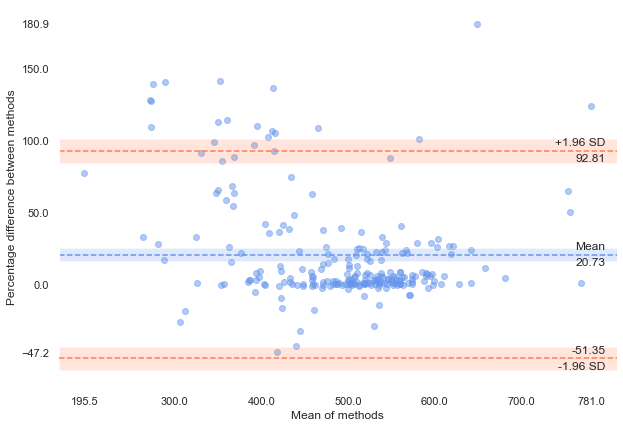

In [46]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['time_in_bed_act'].values, OA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Time in bed assessed by the Actiwatch and Fitbit are also significantly different. Because 77.43 > 0, Fitbit tends to underestimate time in bed by about 77 minutes on average.

In [21]:
pg.rm_corr(data=sleep, x='time_in_bed_act', y='time_in_bed_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.335674,435,5.712108e-13,"[0.25, 0.42]",1.0


In [37]:
corrdf = sleep.groupby('subject')[['time_in_bed_act', 'time_in_bed_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['time_in_bed_act'] != 1]['time_in_bed_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,time_in_bed_act,group
0,10012,0.857143,Young Adults
1,10014,0.714286,Young Adults
2,10016,0.452381,Young Adults
3,10023,0.268793,Young Adults
4,10024,0.903297,Young Adults
5,10025,0.964835,Young Adults
6,10033,-0.081319,Young Adults
7,10035,0.964835,Young Adults
8,10038,0.753783,Young Adults
9,10040,0.521978,Young Adults


In [41]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['time_in_bed_act'].values, OA['time_in_bed_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.16362125990982, pvalue=0.25099388011671037)

In [42]:
corrdf = sleep.groupby('subject')[['sleep_duration_act', 'sleep_duration_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['sleep_duration_act'] != 1]['sleep_duration_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,sleep_duration_act,group
0,10012,0.857143,Young Adults
1,10014,0.828571,Young Adults
2,10016,0.523810,Young Adults
3,10023,0.236364,Young Adults
4,10024,0.764317,Young Adults
5,10025,0.890110,Young Adults
6,10033,0.264318,Young Adults
7,10035,0.942857,Young Adults
8,10038,0.829670,Young Adults
9,10040,0.538462,Young Adults


In [43]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['sleep_duration_act'].values, OA['sleep_duration_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.4826487990026727, pvalue=0.14513771534438255)

# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

## Sleep Summary Stats <a class="anchor" id="sleep-summary-stats"></a>

In [9]:
sleep = pd.read_csv(data_dir + 'dataset_2021_07_19.csv')
# sleep = sleep[~sleep.index.isin(exclude)]
sleep = sleep.dropna(axis=1, how='all')

In [10]:
sleep[0:5]

,subject,redcap_id,age_group,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,onset_latency_fit,time_in_bed_fit,awake_duration_fit,wake_time_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,joinid,lag_time,arm
0,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.0,556.0,4.0,2019-10-25 05:19:00,552.0,508.0,4.0,10011 2019-10-25,NaN,1
1,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,NaN,NaN,NaN,NaN,482.0,NaN,NaN,10011 2019-10-26,1.0,1
2,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,NaN,NaN,NaN,NaN,538.5,NaN,NaN,10011 2019-10-27,1.0,1
3,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,10011 2019-10-28,1.0,1
4,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,10011 2019-10-29,1.0,1


<AxesSubplot:>

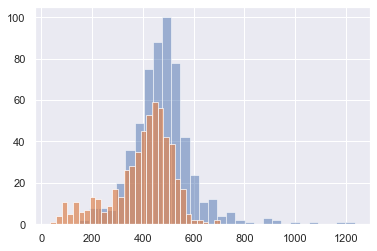

In [16]:
import scipy
sleep['sleep_duration_act'].hist(bins=30, label = "Actiwatch 2.0", alpha = 0.5)
sleep['sleep_duration_fit'].hist(bins=30, label = "Fitbit", alpha = 0.7)
# scipy.stats.shapiro(sleep['sleep_duration_fit'])

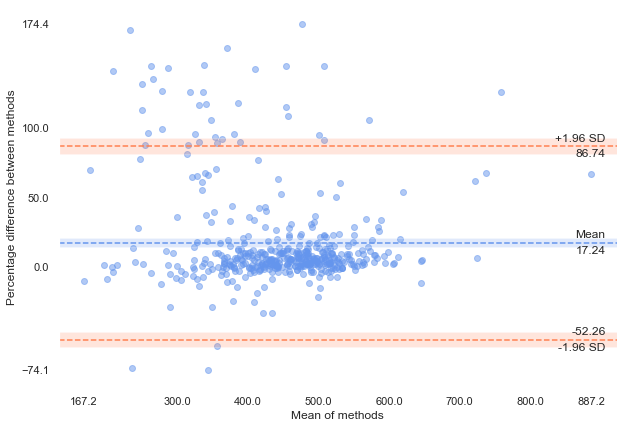

In [17]:
import pyCompare

sleep1 = sleep.dropna(axis = 0)

pyCompare.blandAltman(sleep1['sleep_duration_act'].values, sleep1['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

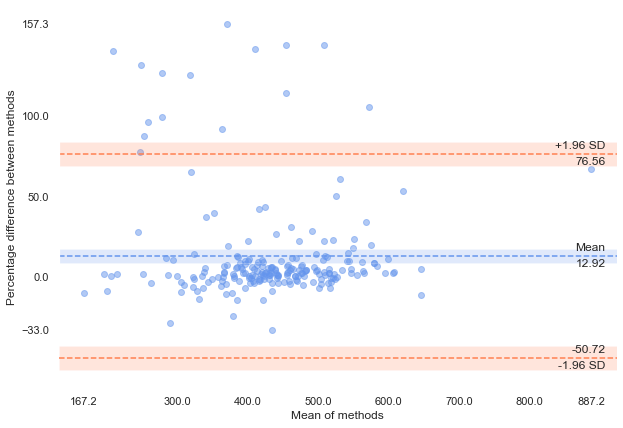

In [47]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['sleep_duration_act'].values, YA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

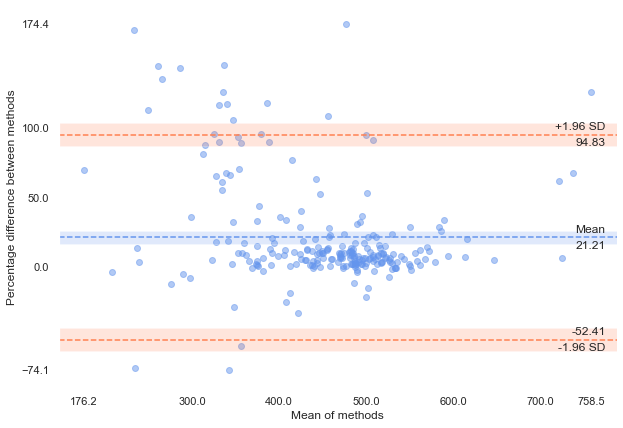

In [48]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['sleep_duration_act'].values, OA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Sleep duration assessed by the Actiwatch and Fitbit are significantly different. Because 70.63 > 0, Fitbit tends to underestimate sleep duration by about 70 minutes on average.

In [18]:
import pingouin as pg
pg.rm_corr(data=sleep, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.382482,435,1.132181e-16,"[0.3, 0.46]",1.0


<AxesSubplot:>

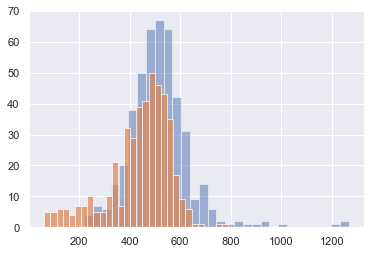

In [19]:
import scipy

sleep1['time_in_bed_act'].hist(bins=30, alpha = 0.5)
sleep1['time_in_bed_fit'].hist(bins=30, alpha = 0.7)
# scipy.stats.shapiro(sleep1['time_in_bed_fit'])

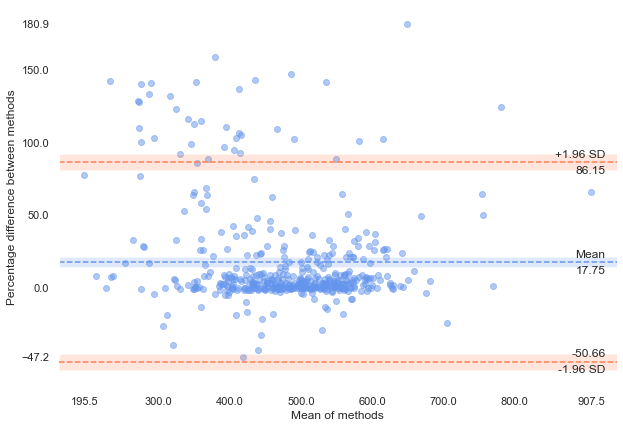

In [20]:
pyCompare.blandAltman(sleep1['time_in_bed_act'].values, sleep1['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

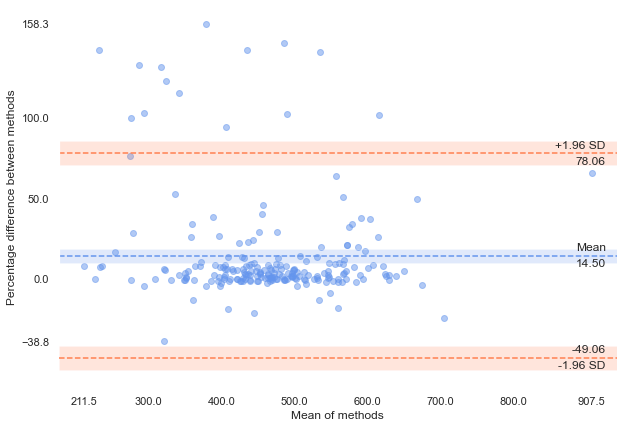

In [45]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['time_in_bed_act'].values, YA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

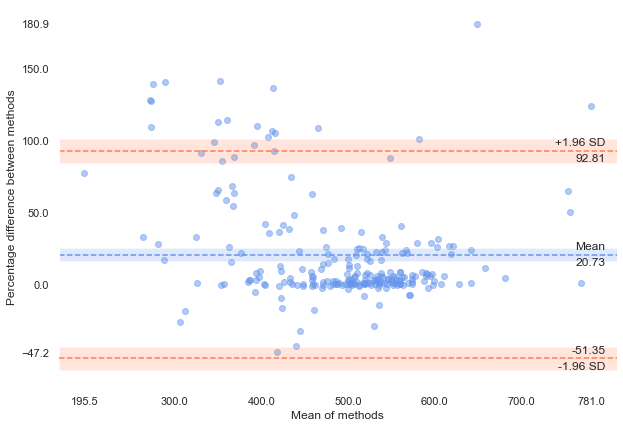

In [46]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['time_in_bed_act'].values, OA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Time in bed assessed by the Actiwatch and Fitbit are also significantly different. Because 77.43 > 0, Fitbit tends to underestimate time in bed by about 77 minutes on average.

In [21]:
pg.rm_corr(data=sleep, x='time_in_bed_act', y='time_in_bed_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.335674,435,5.712108e-13,"[0.25, 0.42]",1.0


In [37]:
corrdf = sleep.groupby('subject')[['time_in_bed_act', 'time_in_bed_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['time_in_bed_act'] != 1]['time_in_bed_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,time_in_bed_act,group
0,10012,0.857143,Young Adults
1,10014,0.714286,Young Adults
2,10016,0.452381,Young Adults
3,10023,0.268793,Young Adults
4,10024,0.903297,Young Adults
5,10025,0.964835,Young Adults
6,10033,-0.081319,Young Adults
7,10035,0.964835,Young Adults
8,10038,0.753783,Young Adults
9,10040,0.521978,Young Adults


In [41]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['time_in_bed_act'].values, OA['time_in_bed_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.16362125990982, pvalue=0.25099388011671037)

In [42]:
corrdf = sleep.groupby('subject')[['sleep_duration_act', 'sleep_duration_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['sleep_duration_act'] != 1]['sleep_duration_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,sleep_duration_act,group
0,10012,0.857143,Young Adults
1,10014,0.828571,Young Adults
2,10016,0.523810,Young Adults
3,10023,0.236364,Young Adults
4,10024,0.764317,Young Adults
5,10025,0.890110,Young Adults
6,10033,0.264318,Young Adults
7,10035,0.942857,Young Adults
8,10038,0.829670,Young Adults
9,10040,0.538462,Young Adults


In [43]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['sleep_duration_act'].values, OA['sleep_duration_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.4826487990026727, pvalue=0.14513771534438255)

# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

<AxesSubplot:xlabel='sleep_duration_act', ylabel='sleep_duration_fit'>

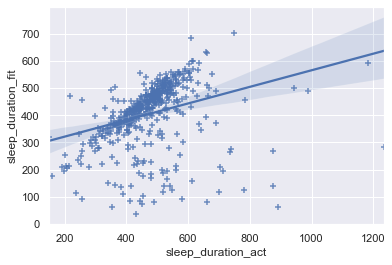

In [28]:
sns.regplot(data = sleep, x='sleep_duration_act', y='sleep_duration_fit', marker="+")

<AxesSubplot:xlabel='time_in_bed_act', ylabel='time_in_bed_fit'>

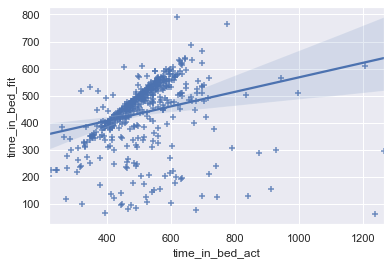

In [29]:
sns.regplot(data = sleep, x='time_in_bed_act', y='time_in_bed_fit', marker="+")

### Additional Interpolation

[pandas interpolate fx](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

[Towards Data Science](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)

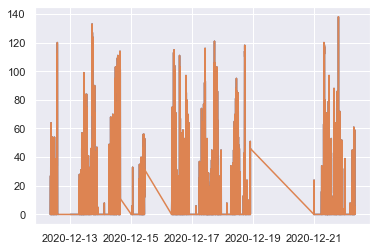

In [16]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='time'))

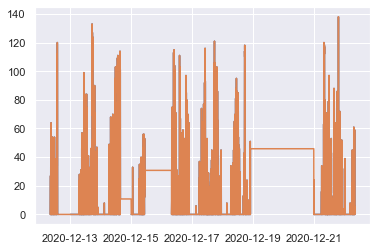

In [19]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='pad'))

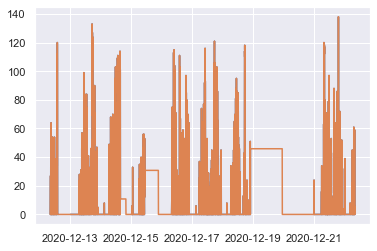

In [26]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='nearest'))

In [80]:
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]
df = fit[record_id][str(ndays)]

In [81]:
import datetime as dt
clocktime = [int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%H")) + (int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%M"))/60) for x in df.index.astype(str)]
df = pd.concat([df.reset_index(), pd.DataFrame(clocktime)], axis=1, ignore_index=True)
df.columns = ['Time', 'Activity', 'Clocktime']
df = df.set_index(['Time'])
df

,Activity,Clocktime
Time,,
2020-12-12 08:19:00,0.0,8.316667
2020-12-12 08:20:00,0.0,8.333333
2020-12-12 08:21:00,0.0,8.350000
2020-12-12 08:22:00,18.0,8.366667
2020-12-12 08:23:00,0.0,8.383333
...,...,...
2020-12-22 08:15:00,31.0,8.250000
2020-12-22 08:16:00,8.0,8.266667
2020-12-22 08:17:00,0.0,8.283333


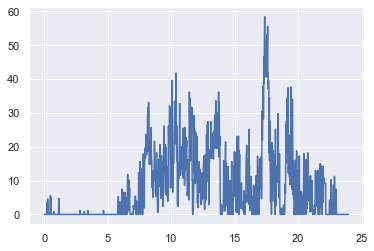

In [84]:
plt.plot(df.groupby('Clocktime').mean())

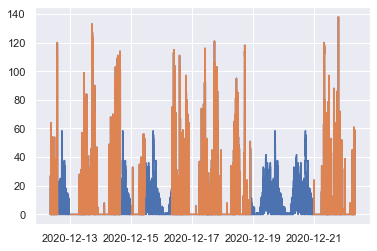

In [88]:
plt.plot(df.index, df.groupby('Clocktime').transform(lambda x: x.fillna(x.mean())))
plt.plot(df.index, df['Activity'])

<a id=’clockfill’></a>
### Clockfill

Now we want to do this for all subjects' fitbit data.

In [ ]:
from wearables import clockfill

fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]
fitFill = {}

for record_id in fit.keys():
    for ndays in fit[record_id].keys():
        try:
            fitFill[str(record_id)][str(ndays)] = clockfill.clockfill(fit[record_id][str(ndays)], record_id, data_dir + 'fitbit/preproc', clockplot=True, interpolateplot=True)
        except Exception as e:
            print(e)
    np.save(data_dir + '/fitbit/fit_clockfill.npy', fit)

## Visualize model fit

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wearables import plotcosinor
import seaborn as sns
sns.set()

for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            d1 = np.load(data_dir + 'fitbit/fit_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d1, 'antilogistic', 'Fitbit')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
        try:
            d = np.load(data_dir + 'actiwatch/act_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d, 'antilogistic', 'Actiwatch 2.0')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_act_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
#         try:
#             d2 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()][record_id][ndays]
#             plotcosinor.plotcosinor(d2, 'antilogistic', 'Fitbit')
#             plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_clockfill_cr_plot.png', dpi = 300)
#             plt.close('all')
#         except Exception as e:
#             print(e)


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20181'
'20181'
'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20178'
'20178'
'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

array must not contain infs or NaNs


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


array must not contain infs or NaNs


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20177'
'20177'
'10076'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'10076'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20180'
'20180'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20184'
'20184'
'Activity'
'Activity'
'20176'
'20176'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20182'
'20182'


In [11]:
from wearables import fitcosinor

cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

fitFill = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()]
cr_fitFill = pd.DataFrame(index = list(fitFill.keys()), columns = cols)

for record_id in fitFill.keys():
    print(record_id)
    for ndays in fitFill[record_id].keys():
        try:
            cr_fitFill.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fitFill[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fitFill.to_csv(data_dir + '/fitbit/cr_fitFill.csv')

10011


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10159
20076
array must not contain infs or NaNs
array must not contain infs or NaNs
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
'Activity'
'Activity'
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


## PVT <a class="anchor" id="pvt"></a>

In [142]:
df1 = pd.read_csv(data_dir + 'dataset_2021-08-06.csv')
df1 = df1.set_index('subject')
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,M10_7_fit_norm,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm,beiwe,actiwatch_assignment
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175643,1.639328,-0.731704,409.618573,14.860625,...,0.094496,0.170234,0.537293,0.995893,"[(5, 2, 0)]",0.000217,"[(16, 18, 0)]",0.105243,1,dominant
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.236987,1.640366,-0.680088,18.988752,16.694780,...,0.096201,0.215777,0.224610,0.989213,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.096201,0,dominant
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256265,1.578544,-0.693218,14.231289,16.530233,...,0.105333,0.322627,0.316041,0.995594,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.105333,0,dominant
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625128,1.312806,-0.702707,46.358950,15.080765,...,0.081417,0.169532,0.209467,0.980336,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.091073,0,non-dominant
10023,1,2.0,1.0,1.0,Fitbit Charge 2 HR,0.874169,2.000000,-0.947025,13.167707,18.223667,...,0.095821,0.136185,0.233504,0.808852,"[(7, 35, 0)]",0.010981,"[(20, 49, 0)]",0.103910,1,non-dominant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,1,2.0,2.0,1.0,Fitbit Charge 2 HR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,non-dominant
20235,3,2.0,2.0,1.0,Fitbit Charge 2 HR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,non-dominant
20236,3,2.0,2.0,1.0,Fitbit Charge 2 HR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,non-dominant


In [143]:
pvt = pd.read_csv(data_dir + 'pvt/pvt_results.csv', names = ['subject', 'RT', 'FS', 'NR'], header=None, skiprows=1)
pvt = pvt.set_index('subject')
pvt

,RT,FS,NR
subject,,,
10014,0.343802,6.0,0.0
20105,0.284249,1.0,0.0
10057,0.337248,5.0,0.0
10057,0.303964,3.0,0.0
10062,0.316575,1.0,0.0
10035,0.267186,1.0,0.0
10033,0.343700,0.0,0.0
10025,0.245413,1.0,0.0
20113,0.265601,0.0,0.0


In [144]:
df1 = df1.join(pvt, how = 'outer')
df1 = df1.drop_duplicates('RT')

In [145]:
df1 = df1.groupby('subject').min('RT').reset_index().set_index('subject')

In [146]:
df1[df1['RT'] > 1][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
20123,65000.000000,0.0,13.0
20125,802.881283,9.0,1.0
20129,774.142121,3.0,1.0


In [147]:
df1[df1['FS'] > 10][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
10148,0.532984,27.0,0.0
10149,0.435698,15.0,0.0
10151,0.512348,12.0,0.0
20168,0.527518,26.0,0.0


In [38]:
df1[df1['NR'] > 0][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
20123,65000.000000,0.0,13.0
20125,802.881283,9.0,1.0
20129,774.142121,3.0,1.0


In [39]:
df1.drop(['10148', '10149', '10151', '20168', '20123', '20125', '20129'], axis=0)[df1.columns[df1.columns.str.contains('7_act|RT|FS|NR')].to_list()].corr(method='spearman')[['RT', 'FS', 'NR']]


,RT,FS,NR
actmin_7_act,-0.262955,0.204089,NaN
amp_7_act,0.141392,-0.134329,NaN
alpha_7_act,0.190081,-0.024177,NaN
beta_7_act,-0.174899,0.063006,NaN
phi_7_act,-0.322874,0.069914,NaN
actmin_7_act_norm,0.221053,0.248780,NaN
amp_7_act_norm,0.251822,0.132501,NaN
alpha_7_act_norm,0.196154,-0.190588,NaN
beta_7_act_norm,0.182389,-0.166411,NaN
phi_7_act_norm,0.200202,0.206078,NaN


In [40]:
df1.drop(['10148', '10149', '10151', '20168', '20123', '20125', '20129'], axis=0)[df1.columns[df1.columns.str.contains('7_fit|RT|FS|NR')].to_list()].corr(method='spearman')[['RT', 'FS', 'NR']]



,RT,FS,NR
actmin_7_fit,-0.122661,-0.052942,NaN
amp_7_fit,-0.003830,0.072218,NaN
alpha_7_fit,0.128351,0.028001,NaN
beta_7_fit,-0.060948,-0.050448,NaN
phi_7_fit,-0.002079,0.071534,NaN
actmin_7_fit_norm,-0.313182,-0.052323,NaN
amp_7_fit_norm,-0.166904,-0.110924,NaN
alpha_7_fit_norm,0.047179,-0.176296,NaN
beta_7_fit_norm,0.056188,-0.166324,NaN
phi_7_fit_norm,-0.133239,0.382632,NaN


In [41]:
dfpvt = df1.drop(['10148', '10149', '10151', '20168', '20123', '20125', '20129'], axis=0)

In [42]:
# df1 = df1.drop('RT_zscore', axis=1)
dfpvt = dfpvt.drop('RT_zscore', axis=1)

KeyError: "['RT_zscore'] not found in axis"

In [43]:
from scipy.stats import zscore
dfpvt = dfpvt.join(dfpvt.groupby(['age_group'])['RT'].apply(lambda x : zscore(x,ddof=1, nan_policy='omit')).reset_index().set_index('subject'), lsuffix='', rsuffix='_zscore')


In [44]:
dfpvt['RT_zscore']

subject
10011   -0.610053
10012   -0.514347
10014    0.555673
10016         NaN
10023   -0.444028
10024   -0.623892
10025   -1.484025
10033    0.553570
10035   -1.032660
10038   -0.957150
10045    0.463260
10049   -0.753423
10057   -0.270205
10062   -0.008776
10076         NaN
10139   -0.429915
10140    0.131758
10143    2.950498
10144    0.484350
10146    0.979425
10152    1.009941
20076    1.138306
20103   -1.075844
20105   -0.954379
20108   -1.777105
20113   -1.376600
20115    1.710554
20120   -0.340942
20122    0.274859
20127    0.611304
20131   -1.422664
20142    0.158326
20154    0.408032
20155   -0.693051
20157    1.459903
20163    1.161215
20176    0.367138
20178    0.487169
20180   -0.046927
20181   -0.634988
20182   -0.430487
20184    0.976180
test          NaN
Name: RT_zscore, dtype: float64

<AxesSubplot:xlabel='amp_7_fit_norm', ylabel='amp_7_fit'>

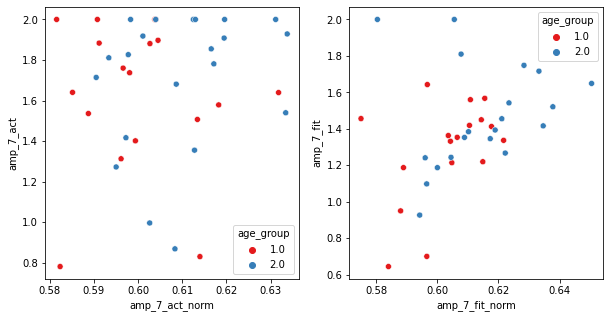

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

dfpvt = dfpvt[dfpvt['amp_7_act_norm'] > 0.5]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7_act_norm', y = 'amp_7_act', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_7_fit_norm', y = 'amp_7_fit', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')


<AxesSubplot:xlabel='phi_7_fit_norm', ylabel='phi_7_fit'>

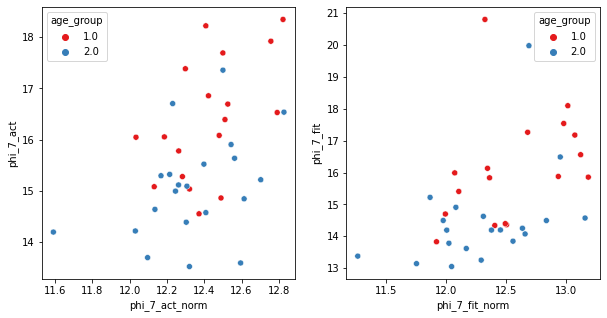

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7_act_norm', y = 'phi_7_act', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_7_fit_norm', y = 'phi_7_fit', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')


<AxesSubplot:xlabel='amp_7_fit_norm', ylabel='RT_zscore'>

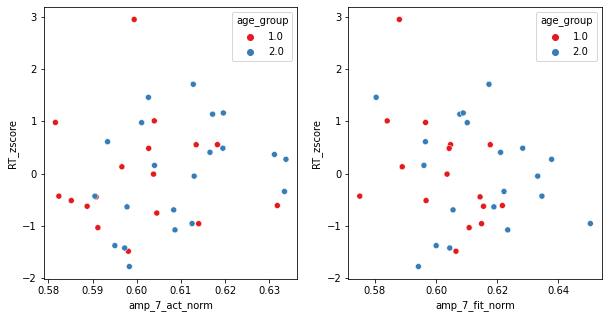

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')


Actiwatch correlation                 phi_7_act_norm        RT
phi_7_act_norm        1.000000  0.139951
RT                    0.139951  1.000000 
 Fitbit correlation                 phi_7_fit_norm        RT
phi_7_fit_norm        1.000000 -0.158139
RT                   -0.158139  1.000000 



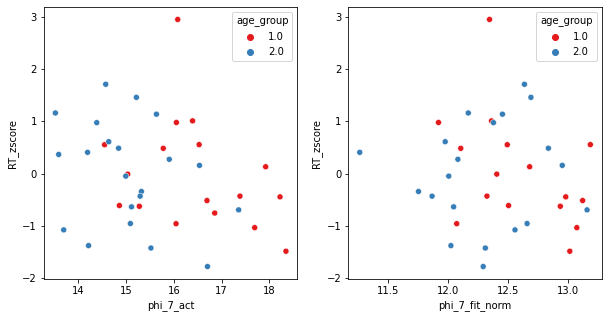

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7_act', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
print('Actiwatch correlation %s \n Fitbit correlation %s \n' %(dfpvt[['phi_7_act_norm', 'RT']].corr(), dfpvt[['phi_7_fit_norm', 'RT']].corr()))


Actiwatch correlation                IS_7_act_norm        RT
IS_7_act_norm       1.000000  0.179102
RT                  0.179102  1.000000 
 Fitbit correlation                IS_7_fit_norm        RT
IS_7_fit_norm       1.000000  0.263154
RT                  0.263154  1.000000 



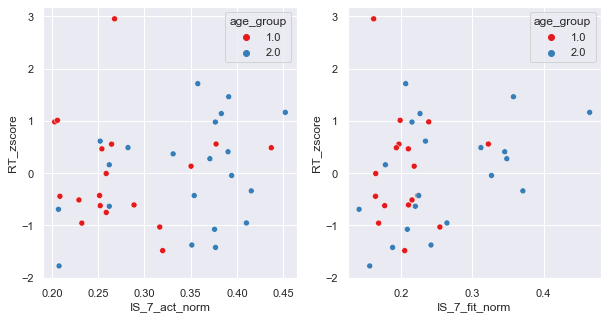

In [97]:
import pingouin as pg
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'IS_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'IS_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
print('Actiwatch correlation %s \n Fitbit correlation %s \n' %(dfpvt[['IS_7_act_norm', 'RT']].corr(), dfpvt[['IS_7_fit_norm', 'RT']].corr()))


<AxesSubplot:xlabel='IV_7_fit_norm', ylabel='RT_zscore'>

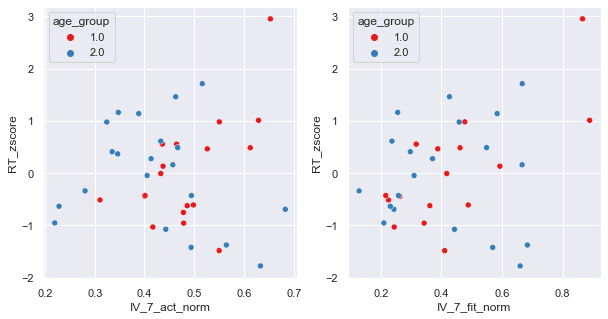

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'IV_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'IV_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')




<AxesSubplot:xlabel='RA_7_fit_norm', ylabel='RT_zscore'>

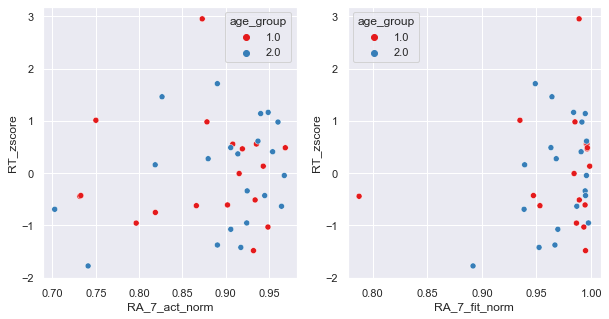

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'RA_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'RA_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')




In [148]:
diary = pd.read_csv(data_dir + "sleep_diaries/sleep_diaries_all.csv", usecols = ['record_id', 'sleep_quality'])
diary.columns = ['subject', 'sleep_quality']

sleep_ratings = [1, 2, 3, 4, 5]
sleep_ratings_descr = ["Very poorly", "Poorly", "Mediocre", "Well", "Very well"]
diary.sleep_quality = diary.sleep_quality.replace(sleep_ratings_descr, sleep_ratings).dropna().astype(float)
diary[diary.sleep_quality == "Well"]



,subject,sleep_quality


In [121]:
diary_mean = diary.groupby('subject').mean()

In [149]:
#dfd = df1.drop('sleep_quality', axis = 1)
dfd = df1.join(diary_mean, how = 'outer')
dfd

,age_group,handedness,gender,actiwatch_arm,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,actmin_10_act,...,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_10_fit_norm,M10_10_fit_norm,beiwe,RT,FS,NR,sleep_quality
subject,,,,,,,,,,,,,,,,,,,,,
10011,1.0,2.0,2.0,2.0,1.175643,1.639328,-0.731704,409.618573,14.860625,1.363736,...,0.170234,0.537293,0.995893,0.000217,0.105243,1.0,0.287571,0.0,0.0,NaN
10012,1.0,1.0,2.0,1.0,1.236987,1.640366,-0.680088,18.988752,16.694780,1.596863,...,0.215777,0.224610,0.989213,0.000522,0.096201,0.0,0.292187,3.0,0.0,NaN
10014,1.0,2.0,2.0,2.0,1.256265,1.578544,-0.693218,14.231289,16.530233,1.362734,...,0.322627,0.316041,0.995594,0.000233,0.105333,0.0,0.343802,6.0,0.0,NaN
10016,1.0,2.0,2.0,1.0,1.625128,1.312806,-0.702707,46.358950,15.080765,1.935143,...,0.169532,0.209467,0.980336,0.000904,0.091073,0.0,NaN,NaN,NaN,NaN
10023,1.0,2.0,1.0,1.0,0.874169,2.000000,-0.947025,13.167707,18.223667,0.917005,...,0.136185,0.233504,0.808852,0.010981,0.103910,1.0,0.295579,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000
20180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.454545
20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.545455


In [152]:
dfd.dropna(subset = ["sleep_quality"])[dfd.columns[dfd.columns.str.contains('7_fit_norm|7_act_norm|sleep_quality')].to_list()].corr(method='spearman')[dfd.columns[dfd.columns.str.contains('sleep_quality')].to_list()[0:5]][0:5]


,sleep_quality
actmin_7_act_norm,NaN
amp_7_act_norm,NaN
alpha_7_act_norm,NaN
beta_7_act_norm,NaN
phi_7_act_norm,NaN


In [128]:
dfcor2.sleep_quality

subject
10011    3.636364
10012         NaN
10014         NaN
10016         NaN
10023    5.000000
           ...   
20180         NaN
20181         NaN
20182         NaN
20184         NaN
test          NaN
Name: sleep_quality, Length: 104, dtype: float64